<a href="https://colab.research.google.com/github/ShirleyLiu11/google-cloud-iot-arduino/blob/master/QinyiL_DuPontAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

myAPIKey='eb6dedb2d4408c741abd383aec7151e5'

stock='TMUS'
balanceStatements=requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()
incomeStatements=requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}').json()

In [32]:
print (balanceStatements[4])

{'date': '2017-12-31', 'symbol': 'TMUS', 'reportedCurrency': 'USD', 'cik': '0001283699', 'fillingDate': '2018-02-08', 'acceptedDate': '2018-02-08 06:15:41', 'calendarYear': '2017', 'period': 'FY', 'cashAndCashEquivalents': 1219000000, 'shortTermInvestments': 0.0, 'cashAndShortTermInvestments': 1219000000, 'netReceivables': 4227000000, 'inventory': 1566000000, 'otherCurrentAssets': 1903000000, 'totalCurrentAssets': 8915000000, 'propertyPlantEquipmentNet': 22196000000, 'goodwill': 1683000000, 'intangibleAssets': 35583000000, 'goodwillAndIntangibleAssets': 37266000000, 'longTermInvestments': 0.0, 'taxAssets': 0.0, 'otherNonCurrentAssets': 2186000000, 'totalNonCurrentAssets': 61648000000, 'otherAssets': 0.0, 'totalAssets': 70563000000, 'accountPayables': 6182000000, 'shortTermDebt': 1612000000, 'taxPayables': 620000000, 'deferredRevenue': 779000000, 'otherCurrentLiabilities': 2942000000, 'totalCurrentLiabilities': 11515000000, 'longTermDebt': 12121000000, 'deferredRevenueNonCurrent': 0.0, 

In [46]:
fourYearBalanceStatement=balanceStatements[:4]
fourYearIncomeStatement=incomeStatements[:4]

In [47]:
profirability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquity=[]

for i in range(0,4):
  profirabilityValue=fourYearIncomeStatement[i]['netIncome']/fourYearIncomeStatement[i]['revenue']
  profirability.append(profirabilityValue)
  assetTurnOverValue=fourYearIncomeStatement[i]['revenue']/fourYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  capitalStructureValue=fourYearBalanceStatement[i]['totalAssets']/fourYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)
  returnOnEquityValue=profirabilityValue*assetTurnOverValue*capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)

In [48]:
print(returnOnEquity)

[0.04376139619692628, 0.046890303623898136, 0.12046267671680157, 0.11683793187151063]


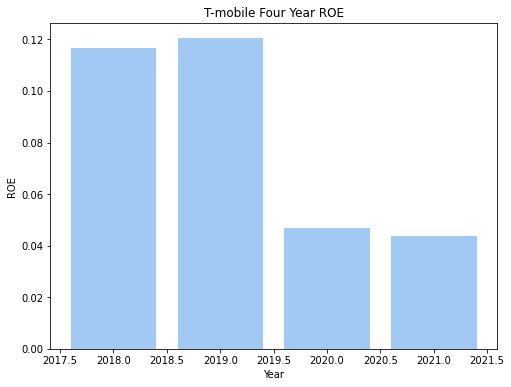

In [49]:
year=[2021,2020,2019,2018]
plt.bar(year, returnOnEquity)
plt.title('T-mobile Four Year ROE')
plt.xlabel('Year')
plt.ylabel('ROE')
plt.show()
